In [1]:
!python --version

Python 3.7.7


In [2]:
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

https://www.kaggle.com/lakshmi25npathi/bike-sharing-dataset

In [3]:
filepath = os.path.join('..', 'data', 'day.csv')
bike_sharing_data = pd.read_csv(filepath)

bike_sharing_data.shape

(731, 16)

In [4]:
bike_sharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
bike_sharing_data = bike_sharing_data[['season', 
                                       'mnth', 
                                       'holiday', 
                                       'workingday', 
                                       'weathersit', 
                                       'temp',
                                       'cnt']]

In [6]:
filepath_to = os.path.join('..', 'data', 'bike_sharing_data_processed.csv')
bike_sharing_data.to_csv(filepath_to, index=False)

In [7]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [8]:
bike_sharing_data['season'].unique()

array([1, 2, 3, 4])

> Kody:
> 1 - spring, 2 - summer, 3 - fall, 4 - winter

In [9]:
bike_sharing_data['workingday'].unique()

array([0, 1])

In [10]:
bike_sharing_data['holiday'].unique()

array([0, 1])

In [11]:
bike_sharing_data['weathersit'].unique()

array([2, 1, 3])

> Kody: 1 - clear, few clouds, 2 - Misty, cloudy, 3 - Light snow, rain, thunderstorm.

In [12]:
bike_sharing_data['temp'].describe()

count    731.000000
mean       0.495385
std        0.183051
min        0.059130
25%        0.337083
50%        0.498333
75%        0.655417
max        0.861667
Name: temp, dtype: float64

> Komentarz: wartości temperatury są zeskalowane (przedział 0-1).

In [13]:
bike_sharing_data.shape

(731, 7)

In [14]:
bike_sharing_data.isnull().sum()

season        0
mnth          0
holiday       0
workingday    0
weathersit    0
temp          0
cnt           0
dtype: int64

# Impact of working day on rentals

In [15]:
bike_sharing_data.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


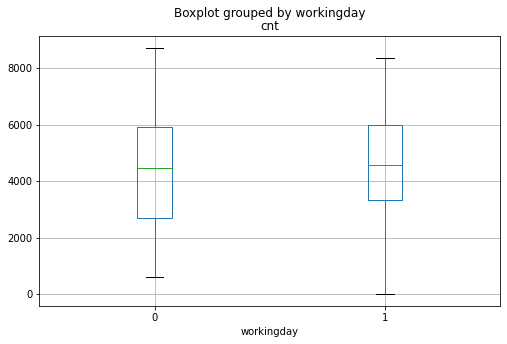

In [16]:
bike_sharing_data.boxplot(column=['cnt'], by='workingday', figsize=(8, 5));

In [17]:
sample_01 = bike_sharing_data[(bike_sharing_data['workingday'] == 1)]

sample_02 = bike_sharing_data[(bike_sharing_data['workingday'] == 0)]

In [18]:
sample_01.shape, sample_02.shape

((500, 7), (231, 7))

T-test wymaga, by próby statystyczne miały podobną liczebność. Z grupy bardziej licznej musimy losowo wybrać odpowienią ilość obserwacji.

In [19]:
sample_01 = sample_01.sample(231, random_state=0)

sample_01.shape, sample_02.shape

((231, 7), (231, 7))

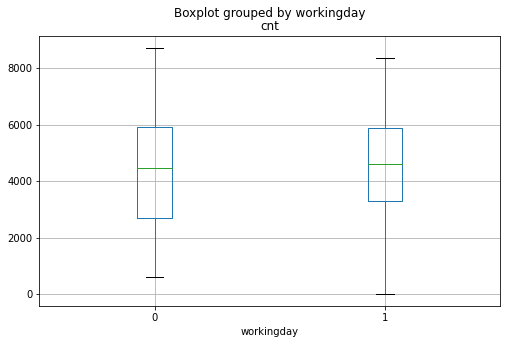

In [20]:
pd.concat([sample_01, sample_02]) \
    .boxplot(column=['cnt'], by='workingday', figsize=(8, 5));

## The hypothesis being tested

* __Null hypothesis (H0): u1 = u2, which translates to the mean of `sample_01` is equal to the mean of `sample 02`__
* __Alternative hypothesis (H1): u1 ? u2, which translates to the means of `sample01` is not equal to `sample 02`__

### Homogeneity of variance
Of these tests, the most common assessment for homogeneity of variance is Levene's test. The Levene's test uses an F-test to test the null hypothesis that the variance is equal across groups. A p value less than .05 indicates a violation of the assumption.

https://en.wikipedia.org/wiki/Levene%27s_test

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.levene.html

To know, [Click here](https://en.wikipedia.org/wiki/Levene%27s_test) why we test for levene's test?

In [21]:
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=1.1785417000946647, pvalue=0.27822166215832583)

Wynik testu: pvalue=0.27 >> 0.05, accept H0, wariancje obu prób są takie same

## Normal distribution  of residuals

### Checking difference between two pair points

https://pythonfordatascience.org/independent-t-test-python/

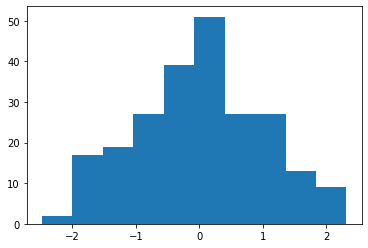

In [22]:
# subtract and standardize results
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt'], dtype=np.float))

plt.hist(diff);

### Checking for normality by Q-Q plot graph

https://www.statisticshowto.datasciencecentral.com/assumption-of-normality-test/

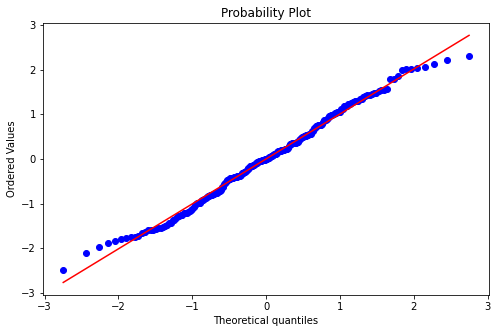

In [23]:
plt.figure(figsize=(8, 5))

stats.probplot(diff, plot=plt, dist='norm')

plt.show()

### Checking normal distribution by `shapiro method`
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

https://stats.stackexchange.com/questions/15696/interpretation-of-shapiro-wilk-test

In [24]:
stats.shapiro(diff)

(0.9909405708312988, 0.16111329197883606)

__Note:-__[See here](https://stats.stackexchange.com/questions/15696/interpretation-of-shapiro-wilk-test)

W test statistic and the second value is the p-value. Since the test statistic does not produce a significant p-value, **the data is indicated to be normally distributed**.

The data met all the assumptions for the t-test which indicates the results can be trusted and the t-test is an appropriate test to be used.

### Independent t-test by using `scipy.stats`

In [25]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=1.251717945777117, pvalue=0.21130878264728534)

### Independent t-test using `researchpy`

https://researchpy.readthedocs.io/en/latest/ttest_documentation.html

In [26]:
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'])

In [27]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4564.082251,1963.584756,129.194392,4309.526436,4818.638066
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4447.125541,2009.585413,93.494375,4263.397575,4630.853508


In [28]:
print(results)

          Independent t-test   results
0  Difference (cnt - cnt) =   233.9134
1      Degrees of freedom =   460.0000
2                       t =     1.2517
3   Two side test p value =     0.2113
4  Difference < 0 p value =     0.8943
5  Difference > 0 p value =     0.1057
6               Cohen's d =     0.1165
7               Hedge's g =     0.1163
8           Glass's delta =     0.1191
9                       r =     0.0583


# Impact of temperature on bike rentals

In [29]:
bike_sharing_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


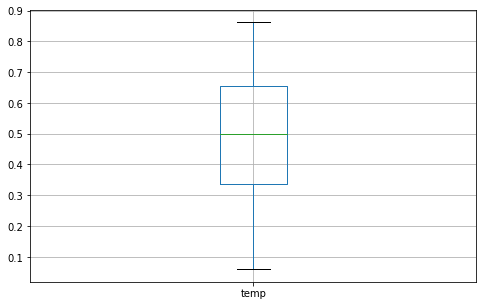

In [30]:
bike_sharing_data[['temp']].boxplot(figsize=(8, 5));

In [31]:
# create 2 categories - below mean = hot, above mean = cold
bike_sharing_data['temp_category'] = \
    bike_sharing_data['temp'] > bike_sharing_data['temp'].mean()

In [32]:
bike_sharing_data.sample(10)

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
12,1,1,0,1,1,0.165000,1406,False
78,1,3,0,0,1,0.332500,2471,False
180,3,6,0,1,1,0.696667,5515,True
540,3,6,0,0,1,0.743333,6891,True
279,4,10,0,1,1,0.510833,4985,True
515,2,5,0,1,2,0.656667,6855,True
54,1,2,0,1,2,0.295652,1807,False
275,4,10,0,1,2,0.384167,3570,False
729,1,12,0,0,1,0.255833,1796,False
342,4,12,0,1,1,0.290833,3620,False


In [33]:
bike_sharing_data.groupby('temp_category')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
temp_category,,,,,,,,
False,364.0,3387.664835,1691.340133,22.0,1964.5,3301.0,4513.5,8090.0
True,367.0,5611.904632,1475.698228,1115.0,4548.5,5336.0,6897.5,8714.0


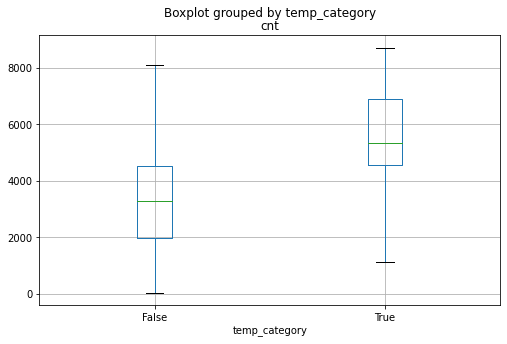

In [34]:
bike_sharing_data.boxplot(column=['cnt'], by='temp_category', figsize=(8, 5));

In [35]:
sample_01 = bike_sharing_data[(bike_sharing_data['temp_category'] == True)]

sample_02 = bike_sharing_data[(bike_sharing_data['temp_category'] == False)]

In [36]:
sample_01.shape, sample_02.shape

((367, 8), (364, 8))

In [37]:
sample_01 = sample_01.sample(364, random_state=0)

sample_01.shape, sample_02.shape

((364, 8), (364, 8))

In [38]:
stats.levene(sample_01['cnt'], sample_02['cnt'])

LeveneResult(statistic=4.372440936144955, pvalue=0.03687172322523208)

> Komentarz: pvalue < 0.05, przyjmujemy H1 - wariancje obu prób statystycznych są różne

(array([ 6.,  9., 23., 39., 52., 72., 62., 55., 38.,  8.]),
 array([-2.83221334, -2.33275804, -1.83330274, -1.33384744, -0.83439214,
        -0.33493684,  0.16451846,  0.66397376,  1.16342905,  1.66288435,
         2.16233965]),
 <a list of 10 Patch objects>)

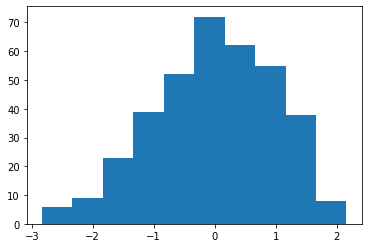

In [39]:
diff = scale(np.array(sample_01['cnt']) - np.array(sample_02['cnt']))
plt.hist(diff)

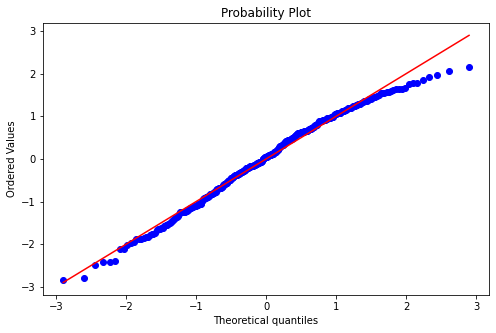

In [40]:
plt.figure(figsize=(8, 5))
stats.probplot(diff, plot=plt)
plt.show()

In [41]:
stats.shapiro(diff)

(0.986929714679718, 0.0023010754957795143)

> Komentarz: pvalue < 0.05, przyjmujemy H1 - dane (różnice) nie mają rozkładu normalnego

In [42]:
stats.ttest_ind(sample_01['cnt'], sample_02['cnt'])

Ttest_indResult(statistic=18.94790354822067, pvalue=2.3223723053447757e-65)

> Komentarz: pvalue << 0.05, przyjmujemy H1 - wartości średnie obu prób statystycznych są statystycnie istotnie różne

> **Znaczenie biznesowe**: ilość rowerów wypożyczanych w ciepłe dni jest statystycznie istotnie wyższa od ilości rowerów wypożyczanych w dni chłodne.

In [43]:
# equal_variances=False => Welch t-test
descriptives, results = rp.ttest(sample_01['cnt'], sample_02['cnt'], equal_variances=False)

In [44]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,364.0,5619.343407,1479.458808,77.544712,5466.850130,5771.836683
1,cnt,364.0,3387.664835,1691.340133,88.650311,3213.332169,3561.997501
2,combined,728.0,4503.504121,1941.147105,71.943698,4362.261919,4644.746322


In [45]:
print(results)

              Welch's t-test    results
0  Difference (cnt - cnt) =   2231.6786
1      Degrees of freedom =    713.3714
2                       t =     18.9479
3   Two side test p value =      0.0000
4  Difference < 0 p value =      1.0000
5  Difference > 0 p value =      0.0000
6               Cohen's d =      1.4045
7               Hedge's g =      1.4031
8           Glass's delta =      1.5084
9                       r =      0.5786
